In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
import seaborn as sns
data = yf.download(tickers = 'BTC-USD' , start = '2021-04-01', end = '2024-08-01')
data.head(10)

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2021-04-01  58926.562500  59586.070312  58505.277344  59095.808594   
2021-04-02  59098.878906  60267.187500  58869.281250  59384.312500   
2021-04-03  59397.410156  60110.269531  57603.890625  57603.890625   
2021-04-04  57604.839844  58913.746094  57168.675781  58758.554688   
2021-04-05  58760.875000  59891.296875  57694.824219  59057.878906   
2021-04-06  59171.933594  59479.578125  57646.808594  58192.359375   
2021-04-07  58186.507812  58731.144531  55604.023438  56048.937500   
2021-04-08  56099.914062  58338.738281  55879.085938  58323.953125   
2021-04-09  58326.562500  58937.046875  57807.863281  58245.003906   
2021-04-10  58253.777344  61276.664062  58038.707031  59793.234375   

               Adj Close       Volume  
Date                                   
2021-04-01  59095.808594  61669163792  
2021-04-02  59384.312500  58727860620  
2021-04-03  57603.890625  59641344484  
2021-04-04  58758.554688  50749662970  
2021-04-05  59057.878906  60706272115  
2021-04-06  58192.359375  66058027988  
2021-04-07  56048.937500  75645303584  
2021-04-08  58323.953125  53053855641  
2021-04-09  58245.003906  46655208546  
2021-04-10  59793.234375  58238470525

In [2]:
# Adding indicators
data['RSI']=ta.rsi(data.Close, length=15)
data['EMAF']=ta.ema(data.Close, length=20)
data['EMAM']=ta.ema(data.Close, length=100)
data['EMAS']=ta.ema(data.Close, length=150)

data['TargetNextClose'] = data['Adj Close'].shift(-1)

data.dropna(inplace=True)
data.reset_index(inplace = True)
data.drop(['Close', 'Date', 'Open', 'High' , 'Low'], axis=1, inplace=True)

In [3]:
data_set = data.iloc[:,:]#.values
pd.set_option('display.max_columns', None)

data_set.tail(20)

Adj Close       Volume        RSI          EMAF          EMAM  \
844  43652.250000  27868908174  62.482456  41728.780908  35609.971421   
845  43869.152344  22452766169  63.201662  41932.625807  35773.519558   
846  43997.902344  21028503216  63.644893  42129.318810  35936.378623   
847  43739.542969  13507796558  62.038313  42282.673492  36090.896729   
848  43016.117188  18830554085  57.670860  42352.525273  36228.029807   
849  43613.140625  21115795370  60.151377  42472.583878  36374.269626   
850  42520.402344  30026850982  53.951356  42477.138017  36495.975224   
851  43442.855469  25260941032  57.878219  42569.111108  36633.537209   
852  42627.855469  22992093014  53.555017  42574.705809  36752.236580   
853  42099.402344  26000021055  50.913026  42529.438812  36858.121051   
854  42156.902344  16013925945  51.193719  42493.959149  36963.047413   
855  42265.187500  16397498810  51.750421  42472.171372  37068.040286   
856  44167.332031  18426978443  60.277847  42633.615245  37208.620321   
857  44957.968750  39335274536  63.176190  42854.982245  37362.072765   
858  42848.175781  46342323118  52.271609  42854.334011  37470.708468   
859  44179.921875  30448091210  57.260765  42980.580474  37603.564179   
860  44162.691406  32336029347  57.177910  43093.162467  37733.447887   
861  43989.195312  16092503468  56.299055  43178.498929  37857.324073   
862  43943.097656  19330573863  56.053784  43251.317855  37977.834441   
863  46970.503906  42746192015  66.364670  43605.526051  38155.907104   

             EMAS  TargetNextClose  
844  33634.982548     43869.152344  
845  33770.534465     43997.902344  
846  33905.996292     43739.542969  
847  34036.241943     43016.117188  
848  34155.180688     43613.140625  
849  34280.451680     42520.402344  
850  34389.590100     43442.855469  
851  34509.500899     42627.855469  
852  34617.028774     42099.402344  
853  34716.133060     42156.902344  
854  34814.686296     42265.187500  
855  34913.368431     44167.332031  
856  35035.937485     44957.968750  
857  35167.355118     42848.175781  
858  35269.087842     44179.921875  
859  35387.112134     44162.691406  
860  35503.344972     43989.195312  
861  35615.740340     43943.097656  
862  35726.036464     46970.503906  
863  35874.969807     46569.613281

In [4]:
data_set.corr()

Adj Close    Volume       RSI      EMAF      EMAM      EMAS  \
Adj Close         1.000000  0.194460  0.178249  0.982044  0.892803  0.840234   
Volume            0.194460  1.000000 -0.077050  0.218151  0.264332  0.307142   
RSI               0.178249 -0.077050  1.000000  0.017805 -0.178702 -0.222894   
EMAF              0.982044  0.218151  0.017805  1.000000  0.941169  0.893570   
EMAM              0.892803  0.264332 -0.178702  0.941169  1.000000  0.990255   
EMAS              0.840234  0.307142 -0.222894  0.893570  0.990255  1.000000   
TargetNextClose   0.996107  0.190554  0.179831  0.978009  0.887994  0.835145   

                 TargetNextClose  
Adj Close               0.996107  
Volume                  0.190554  
RSI                     0.179831  
EMAF                    0.978009  
EMAM                    0.887994  
EMAS                    0.835145  
TargetNextClose         1.000000

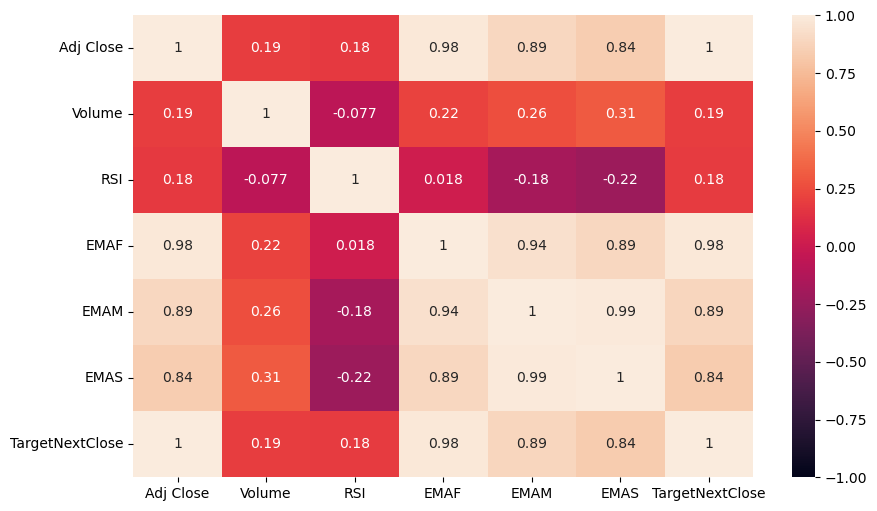

In [5]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(data_set.corr(), vmin=-1, vmax=1, annot=True)

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
X = data_set[['RSI','EMAF','EMAM','EMAS','Volume']] 
y = data_set['TargetNextClose']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(691, 5)
(173, 5)
(691,)
(173,)


In [9]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model Prediction
y_pred = lr.predict(X_test)

# Assuming y_test and y_pred are your actual and predicted values, respectively
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE is the square root of MSE
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2) Score: {r2}")


Mean Absolute Error (MAE): 1092.1699105562334
Mean Squared Error (MSE): 2381592.532852803
Root Mean Squared Error (RMSE): 1543.2409186037037
R-squared (R2) Score: 0.9815958434948895


In [10]:
df_predictions = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred
})

print(df_predictions.to_string(index=False))

 Actual Price  Predicted Price
 61393.617188     59509.980081
 19970.556641     20162.502654
 34059.265625     36824.443543
 28720.271484     31096.272271
 41564.363281     42900.477523
 20049.763672     19425.691241
 29267.224609     29559.224998
 21637.587891     19663.432902
 30414.470703     30922.379714
 29856.562500     30474.650928
 27767.236328     26635.426229
 25832.226562     24927.565379
 36596.683594     36612.498384
 16884.613281     16054.671138
 44179.921875     42297.593401
 26345.998047     26647.772122
 40424.484375     41788.262031
 36457.316406     40780.259320
 17130.486328     16622.818891
 31476.048828     31018.682195
 24319.333984     25391.674656
 47243.304688     50802.222332
 29909.337891     31314.867796
 16955.078125     17350.716139
 30314.333984     30086.881736
 26873.320312     27777.241431
 60622.136719     59316.589023
 30399.066406     30875.628457
 49200.703125     55417.234916
 16679.857422     16515.298912
 52633.535156     50714.389732
 27658.7

In [11]:
from sklearn.ensemble import RandomForestRegressor


# Select features and target variable
X = data_set[['RSI', 'EMAF', 'EMAM', 'EMAS', 'Volume']]
y = data_set['TargetNextClose'].values.reshape(-1, 1)
# Create a Random Forest Regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


# Model Prediction
y_pred_rf = rf.predict(X_test)

# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf, squared=False)  # RMSE is the square root of MSE
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Model:")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf}")
print(f"R-squared (R2) Score: {r2_rf}")


Random Forest Model:
Mean Absolute Error (MAE): 800.0115674674859
Mean Squared Error (MSE): 1747998.7279622154
Root Mean Squared Error (RMSE): 1322.1190294229243
R-squared (R2) Score: 0.9864920460925298


In [12]:
df_predictions = pd.DataFrame({
    'Actual Price': y_test.values,
    'Predicted Price': y_pred_rf
})

print(df_predictions.to_string(index=False))

 Actual Price  Predicted Price
 61393.617188     62008.043594
 19970.556641     21020.323730
 34059.265625     39284.939180
 28720.271484     29941.617070
 41564.363281     43032.886289
 20049.763672     20143.573750
 29267.224609     29647.209258
 21637.587891     20899.277637
 30414.470703     30197.533535
 29856.562500     30065.018281
 27767.236328     27747.209902
 25832.226562     25546.100859
 36596.683594     33786.476543
 16884.613281     16931.110908
 44179.921875     42804.837383
 26345.998047     26875.811406
 40424.484375     40236.414961
 36457.316406     40144.480078
 17130.486328     17017.819922
 31476.048828     30357.122188
 24319.333984     24261.748828
 47243.304688     48962.145156
 29909.337891     30460.499590
 16955.078125     17329.962500
 30314.333984     29545.232656
 26873.320312     27777.658496
 60622.136719     61099.185273
 30399.066406     30226.139766
 49200.703125     54285.965703
 16679.857422     16821.726836
 52633.535156     51054.632930
 27658.7

In [13]:
from xgboost import XGBRegressor

# Select features and target variable
X = data_set[['RSI', 'EMAF', 'EMAM', 'EMAS', 'Volume']]
y = data_set['TargetNextClose'].values.reshape(-1, 1)

# Create an XGBoost Regressor (gradient boosting model)
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

# Model Prediction
y_pred_xgb = xgb.predict(X_test)

# Evaluate the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mean_squared_error(y_test, y_pred_xgb, squared=False)  # RMSE is the square root of MSE
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model:")
print(f"Mean Absolute Error (MAE): {mae_xgb}")
print(f"Mean Squared Error (MSE): {mse_xgb}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb}")
print(f"R-squared (R2) Score: {r2_xgb}")


XGBoost Model:
Mean Absolute Error (MAE): 824.3043262283237
Mean Squared Error (MSE): 1641950.945038327
Root Mean Squared Error (RMSE): 1281.3863371514178
R-squared (R2) Score: 0.9873115481555521


In [14]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Select features and target variable
X = data_set[['RSI', 'EMAF', 'EMAM', 'EMAS']]
y = data_set['TargetNextClose'].values.reshape(-1, 1)



In [15]:
# Scaling the data
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_normalized = scaler_X.fit_transform(X)
y_normalized = scaler_y.fit_transform(y.reshape(-1, 1))



In [16]:
# Prepare data for LSTM model
def create_sequences(data, seq_length):
    sequences = []
    target = []
    for i in range(len(data)-seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length][-1]  # TargetNextClose is assumed to be the last column
        sequences.append(seq)
        target.append(label)
    return np.array(sequences), np.array(target)

# Define sequence length (number of time steps to look back)
sequence_length = 10  

# Create sequences and targets
X_seq, y_seq = create_sequences(np.concatenate((X_normalized, y_normalized), axis=1), sequence_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq[:, :-1, :], y_seq, test_size=0.2, random_state=42)

In [23]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))  # Output layer with one neuron for regression
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Make predictions
y_pred = model.predict(X_test)



Epoch 1/100
22/22 [==============================] - 2s 18ms/step - loss: 0.0161 - val_loss: 0.0097
Epoch 2/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 3/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 4/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0021 - val_loss: 0.0025
Epoch 5/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 6/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 7/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0022
Epoch 8/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 9/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 10/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0016 - val_loss: 0.0019
Epoch 11

22/22 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 84/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 85/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 86/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0012
Epoch 87/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0010 - val_loss: 0.0013
Epoch 88/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 89/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 90/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0014
Epoch 91/100
22/22 [==============================] - 0s 4ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 92/100
22/22 [==============================] - 0s 5ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 93/100


In [24]:
# Evaluate the LSTM model
mae_lstm = mean_absolute_error(y_test, y_pred)
mse_lstm = mean_squared_error(y_test, y_pred)
rmse_lstm = mean_squared_error(y_test, y_pred, squared=False)  
r2_lstm = r2_score(y_test, y_pred)

print("LSTM Model:")
print(f"Mean Absolute Error (MAE): {mae_lstm}")
print(f"Mean Squared Error (MSE): {mse_lstm}")
print(f"Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"R-squared (R2) Score: {r2_lstm}")

LSTM Model:
Mean Absolute Error (MAE): 0.02365499398021672
Mean Squared Error (MSE): 0.0010953509102624873
Root Mean Squared Error (RMSE): 0.0330960860263338
R-squared (R2) Score: 0.9822653419158961


In [25]:
# Inverse transform predictions to original scale
y_pred_original_scale = scaler_y.inverse_transform(y_pred.reshape(-1, 1))
y_test_original_scale = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# Print actual and predicted output
df_results = pd.DataFrame({'Actual': y_test_original_scale.flatten(), 'Predicted': y_pred_original_scale.flatten()})
print(df_results)

           Actual     Predicted
0    64469.527344  65168.492188
1    16669.439453  17347.765625
2    44348.730469  42506.417969
3    42287.664062  45343.824219
4    36693.125000  35881.550781
..            ...           ...
166  43503.847656  46888.125000
167  29562.361328  30156.765625
168  48176.347656  46209.531250
169  20381.650391  24033.955078
170  43565.113281  44116.007812

[171 rows x 2 columns]
